In [2]:
import warnings
import pandas as pd
import numpy as np
    
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Fast compile option: if the GOGREEN class has already been compiled and there has 
# been no change made to the catalog, uncomment the second line before running
priorCatalog = pd.DataFrame()
#priorCatalog = gg.catalog

with warnings.catch_warnings(): #suppressing depracation warnings for the import and instantion process for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)

    # Import
    %run "C:/Users/panda/Documents/Github/GOGREEN-Research/Code/GOGREEN_WITH_FLAGS.py"

    # Instantiate
    gg = GOGREEN( 'C:/Users/panda/Desktop/GOGREEN_Working/', priorCatalog=priorCatalog)
    
    #print(gg.catalog.columns.to_list())

In [3]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag == 0',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [4]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 89
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 2
starForming and postStarBurst: 1
passive: 161
passive and greenValley: 0
passive and blueQuiescent: 15
passive and postStarBurst: 14
greenValley: 38
greenValley and blueQuiescent: 4
greenValley and postStarBurst: 1
blueQuiescent: 21
blueQuiescent and postStarBurst: 7
postStarBurst: 16


In [5]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.8',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [6]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 128
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 239
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 15
greenValley: 53
greenValley and blueQuiescent: 8
greenValley and postStarBurst: 1
blueQuiescent: 37
blueQuiescent and postStarBurst: 7
postStarBurst: 17


In [7]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag == 0',
            'Mstellar > 10**9.5',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [8]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 131
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 5
starForming and postStarBurst: 1
passive: 185
passive and greenValley: 0
passive and blueQuiescent: 24
passive and postStarBurst: 14
greenValley: 43
greenValley and blueQuiescent: 7
greenValley and postStarBurst: 2
blueQuiescent: 36
blueQuiescent and postStarBurst: 8
postStarBurst: 17


In [9]:
# Establish criteria ( run before calling plot() )

searchCriteria = [
            'Star == 0',
            'K_flag < 4',
            'Mstellar > 10**9.5',
            '(1 < zspec < 1.5) or ((((Redshift_Quality != 3) and (Redshift_Quality != 4)) or (SPECID < 0)) and (1 < zphot < 1.5))',
            'cluster_id <= 12',
            'totmask == 0',
            'Fit_flag > 2',
            'n < 6',
            'HSTFOV_flag == 1',
            're > 0'
]
gg.standardCriteria = searchCriteria

In [10]:
gg.setGoodData(["member_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 185
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 8
starForming and postStarBurst: 1
passive: 268
passive and greenValley: 0
passive and blueQuiescent: 34
passive and postStarBurst: 15
greenValley: 60
greenValley and blueQuiescent: 11
greenValley and postStarBurst: 2
blueQuiescent: 53
blueQuiescent and postStarBurst: 8
postStarBurst: 18


In [11]:
gg.setGoodData(["nonmember_adjusted == 1"], True)

transitionTypes = ['starForming', 'passive', 'greenValley', 'blueQuiescent', 'postStarBurst']
for i in range(0,5):
    for j in range(i,5):
        if i == j:
            print(transitionTypes[i] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1)].shape[0]))
        else:
            print(transitionTypes[i] + " and " + transitionTypes[j] + ": " + str(gg.catalog[(gg.catalog['goodData'] == 1) & (gg.catalog[transitionTypes[i]] == 1) & (gg.catalog[transitionTypes[j]] == 1)].shape[0]))

starForming: 169
starForming and passive: 0
starForming and greenValley: 0
starForming and blueQuiescent: 10
starForming and postStarBurst: 1
passive: 72
passive and greenValley: 0
passive and blueQuiescent: 14
passive and postStarBurst: 6
greenValley: 30
greenValley and blueQuiescent: 5
greenValley and postStarBurst: 0
blueQuiescent: 29
blueQuiescent and postStarBurst: 3
postStarBurst: 7


['member_adjusted == 1']
Quiescent count: 268
Star Forming count: 185
Green Valley count: 60
268 185 268 185


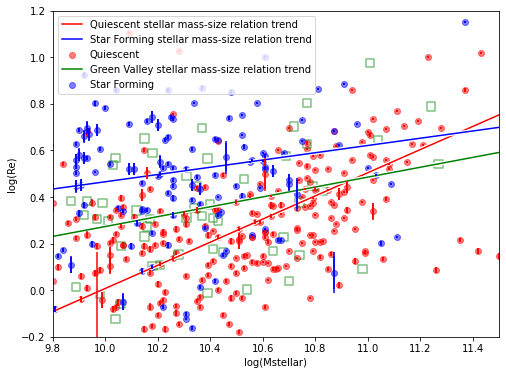

In [12]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='GV')

['member_adjusted == 1']
Quiescent count: 268
Star Forming count: 185
Blue Quiescent count: 53
268 185 268 185


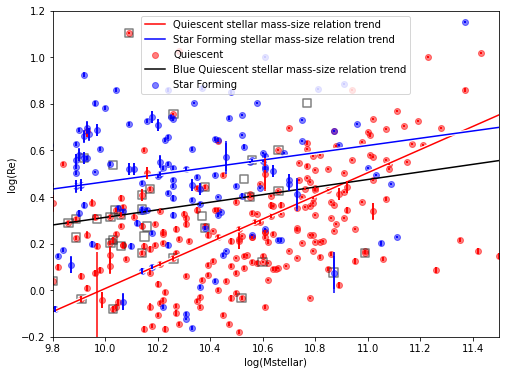

In [13]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='BQ')

['member_adjusted == 1']
Quiescent count: 268
Star Forming count: 185
Post-starburst count: 18
268 185 268 185


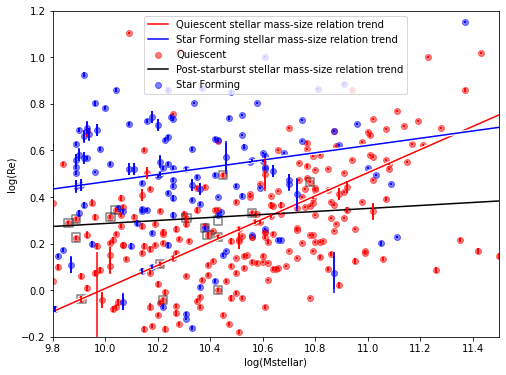

In [14]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='only', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.8,11.5], yRange=[-0.2,1.2], fitLine=True, bootstrap=False, plotErrBars=True, plotTransitionType='PSB')

['nonmember_adjusted == 1']
Quiescent count: 72
Star Forming count: 169
72 169 72 169


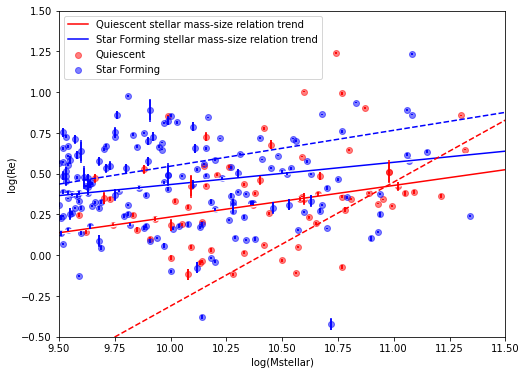

In [15]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.plot('Mstellar', 're_converted', 3, useMembers='not', useLog=[True,True], colorType='passive', xLabel='log(Mstellar)', yLabel='log(Re)', xRange=[9.5,11.5], yRange=[-0.5,1.5], fitLine=True, bootstrap=False, plotErrBars=True)

Quiescent cluster count: 161
Star-Forming cluster count: 89
Quiescent field count: 50
Star-Forming field count: 88
(0.7509620152735107, 1.178542840635526)


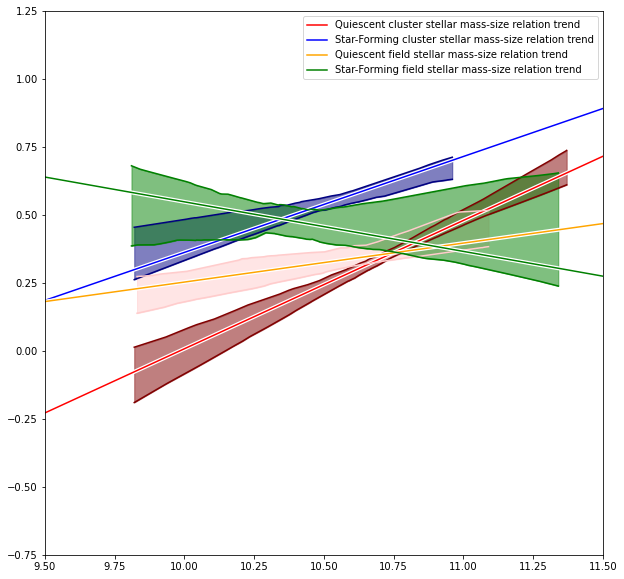

In [17]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5)
    print(ratio) # first value is quiescent ratio, second is sf

Quiescent cluster count: 161
Star-Forming cluster count: 89
Quiescent field count: 50
Star-Forming field count: 88
GV cluster count: 38
GV field count: 11
BQ cluster count: 21
BQ field count: 18
PSB cluster count: 16


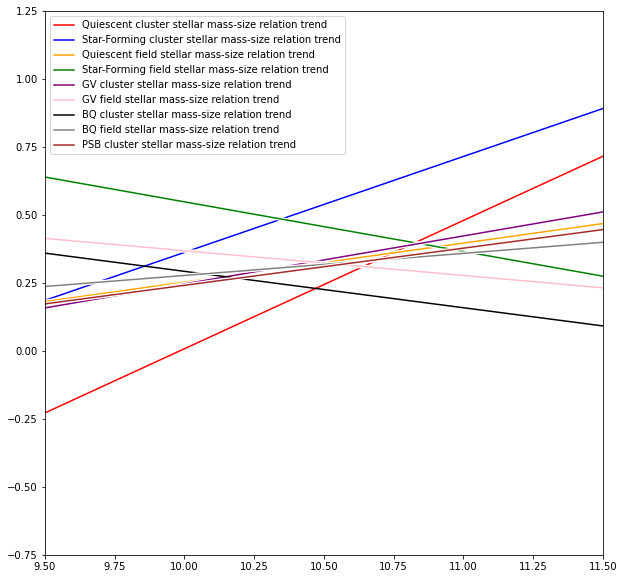

In [18]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    gg.compTrends(x=10.5, plotType="transition", bootstrap=False)

cluster count: 288
field count: 149
0.9119895951576982


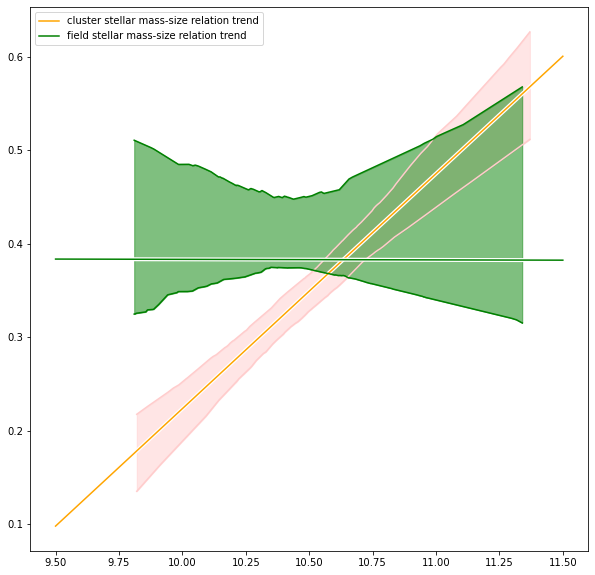

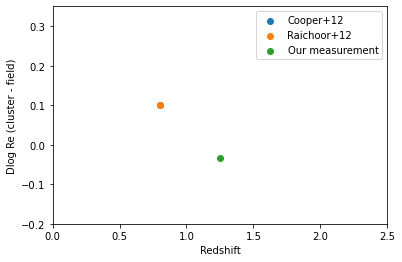

In [19]:
with warnings.catch_warnings(): #suppressing depracation warnings for readability purposes
    warnings.simplefilter("ignore")
    warnings.warn("deprecated", DeprecationWarning)
    
    ratio = gg.compTrends(x=10.5, plotType="lit", limitRange=False)
    print(ratio[0])